In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C://Users//HP//Desktop//Future_Sale_Prediction//Advertising.csv",index_col=0)
df.head(2)

,TV,radio,newspaper,sales
ID,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4


In [3]:
df.tail()

,TV,radio,newspaper,sales
ID,,,,
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.drop_duplicates()

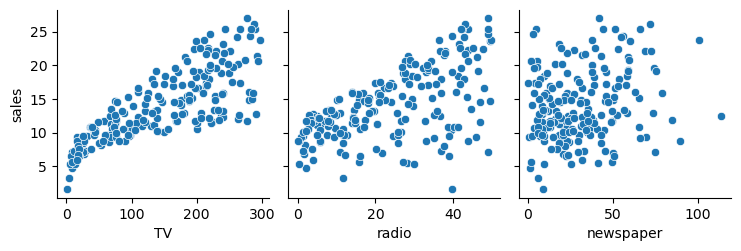

In [11]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales')

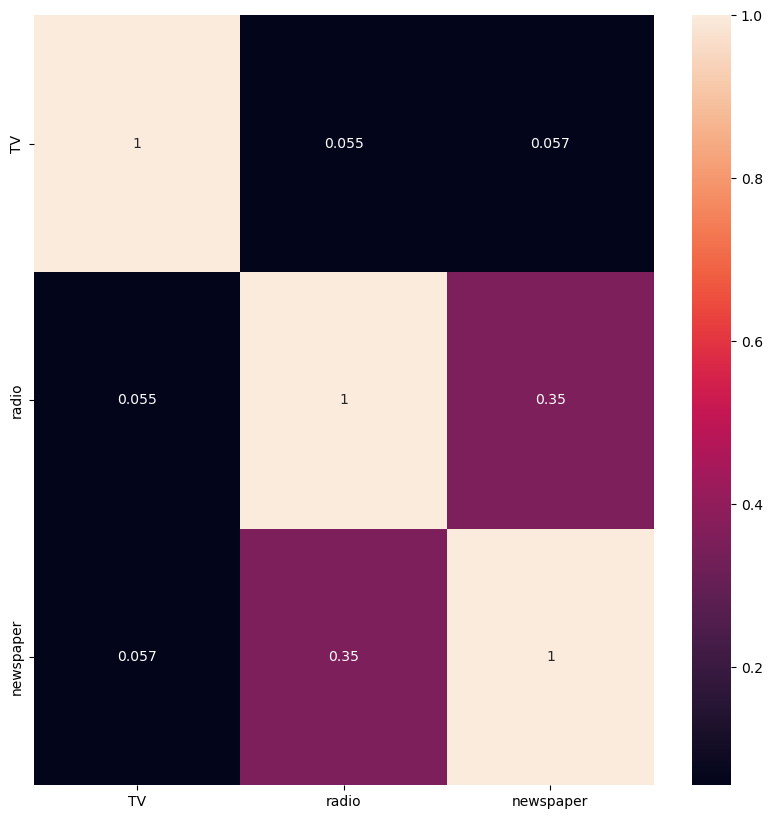

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:-1].corr(),annot=True)
plt.show()

In [13]:
x=np.array(df.drop(['sales'],axis=1))
y=np.array(df['sales'])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
lr =LinearRegression()
model=lr.fit(X_train,y_train)
y_predict=model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.8832957189120246

In [18]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

96.12769194894395

In [19]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

97.77770502151674